In [1]:
import pandas as pd
import numpy as np
import os 
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score


In [2]:
# Cargar los datasets
load_dotenv()

ruta_base = os.environ['DATA_DIR']

job_postings = pd.read_csv(ruta_base + "/cleaned_datasets/job_postings.csv")

In [3]:
job_postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3317 entries, 0 to 3316
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3317 non-null   int64  
 1   job_title           3317 non-null   object 
 2   job_info            3317 non-null   object 
 3   position_type_id    3317 non-null   int64  
 4   company             3317 non-null   object 
 5   city                3317 non-null   object 
 6   location_id         3317 non-null   int64  
 7   seniority_level_id  3317 non-null   int64  
 8   work_type           3317 non-null   object 
 9   industry_type_id    3317 non-null   int64  
 10  min_salary          3317 non-null   float64
 11  max_salary          3317 non-null   float64
 12  avg_salary          3317 non-null   float64
 13  company_score       3317 non-null   float64
 14  sector              3317 non-null   object 
 15  skills              3317 non-null   object 
dtypes: flo

In [4]:
job_postings.work_type.value_counts()

work_type
Unspecified    1664
In-Person      1514
Remote          119
Hybrid           20
Name: count, dtype: int64

In [5]:
job_postings.seniority_level_id.value_counts()

seniority_level_id
1    1720
4    1221
3     270
2     106
Name: count, dtype: int64

In [6]:
job_postings.industry_type_id.value_counts().sort_values(ascending=True)

industry_type_id
68      1
70      1
9       1
36      1
39      1
     ... 
55    103
25    140
73    322
72    859
1     939
Name: count, Length: 80, dtype: int64

In [7]:
job_postings.sector.value_counts().sort_values(ascending=True)

sector
Accounting & Legal                           1
Non-Profit Organizations                     1
Restaurants & Food Services                  1
Arts, Entertainment & Recreation             1
Agriculture & Forestry                       1
Hotels & Resorts                             1
Mining & Metals                              2
Energy, Mining & Public Infrastructure       2
Media & Entertainment                        4
Arts & Entertainment                         4
Construction, Repair & Maintenance           4
Educación                                    5
Travel & Tourism                             5
Media                                        5
Real Estate                                  5
Transportation & Logistics                   6
Telecommunications                           6
Consumer Services                            6
Non-Profit                                   7
Government                                   7
Legal                                        7
Oil, G

In [8]:
job_postings.position_type_id.value_counts()

position_type_id
7     1348
1      727
11     448
14     298
3      244
10     142
9       24
13      20
5       19
8       15
4       12
6        9
12       6
2        5
Name: count, dtype: int64

<Axes: xlabel='avg_salary', ylabel='Count'>

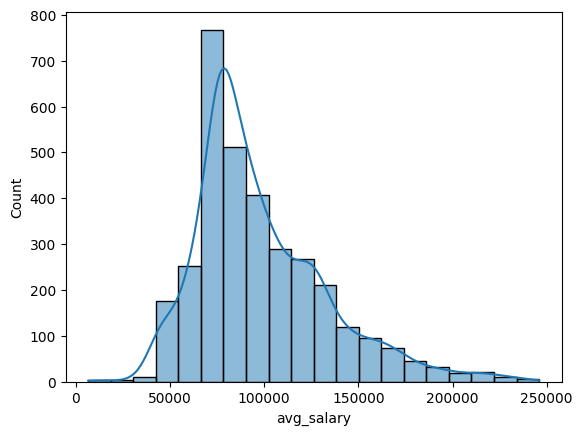

In [9]:
# Crear el histograma
sns.histplot(data=job_postings, x='avg_salary', bins=20, kde=True)

In [10]:
df=job_postings[['seniority_level_id','industry_type_id','position_type_id','location_id','avg_salary']].copy()

In [11]:
# Definición de los rangos (ejemplo personalizado)
rangos = [0, 75000, 100000, 150000, np.inf]  # Ajusta los rangos según tu análisis
labels = ['Menor a 75000$', 'Entre 75000$ y 100000$', 'Entre 100000$ y 150000$', 'Mayor a 150000$']

# Creación de la nueva columna
df['rango_salarial'] = pd.cut(df['avg_salary'], bins=rangos, labels=labels)
# Convertir las categorías a números
df['rango_salarial_num'] = pd.factorize(df['rango_salarial'])[0]

In [12]:
df.rango_salarial.value_counts()

rango_salarial
Entre 75000$ y 100000$     1368
Entre 100000$ y 150000$     932
Menor a 75000$              716
Mayor a 150000$             301
Name: count, dtype: int64

In [13]:
df.rango_salarial_num.value_counts()

rango_salarial_num
0    1368
1     932
3     716
2     301
Name: count, dtype: int64

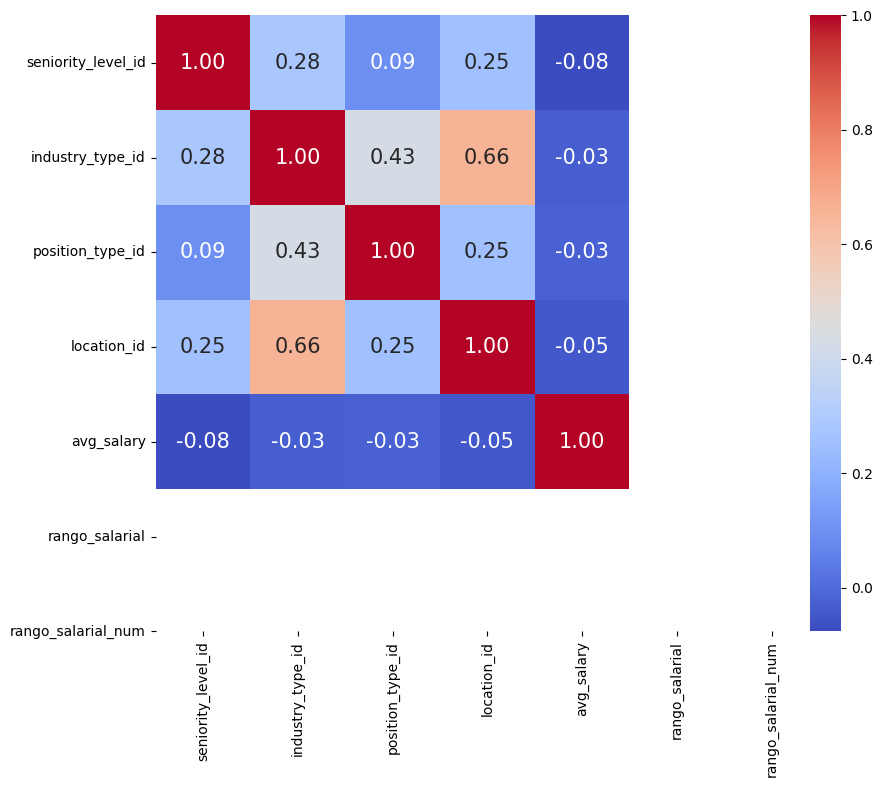

In [14]:
corr = df[['seniority_level_id','industry_type_id','position_type_id','location_id','rango_salarial_num']].corr(method='pearson')
plt.figure(figsize=(10,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df.columns, 
           yticklabels= df.columns,
           cmap= 'coolwarm')
plt.show()

## Modelo arbol de decision

In [15]:
X = df[['seniority_level_id','industry_type_id','position_type_id','location_id']]  
y = df.rango_salarial_num # Etiqueta a predecir

In [16]:
# Importamos el modelo de arbol de decision 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.25, random_state=42)

# Instanciamos un objeto de la clase DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 12, random_state = 42) 

# Entrenamos el modelo
clf.fit(X_Train, Y_Train)

# Exploramos algunas de las características del modelo entrenado. 
print(clf.classes_) #categorias de la variable a predecir 
print(clf.n_classes_) #numero de categorias de la variable a predecir
print(clf.max_features_) #max numero de atributos 
print(clf.feature_importances_) #nivel de relevancia de cada atributo en el mismo orden que fue asignado al instancia el modelo

# Predecimos
y_train_pred = clf.predict(X_Train)
y_test_pred = clf.predict(X_Test)

# Evaluamos
print('Accuracy en train:', accuracy_score(Y_Train, y_train_pred))
print('Accuracy en test:', accuracy_score(Y_Test, y_test_pred))

[0 1 2 3]
4
4
[0.06826399 0.22733359 0.16744307 0.53695935]
Accuracy en train: 0.6875753920386007
Accuracy en test: 0.5228915662650603


In [17]:
cm = confusion_matrix(Y_Test, y_test_pred)
print('Matriz de Confusión:\n', cm)

Matriz de Confusión:
 [[230  74   7  31]
 [ 58 161  10  14]
 [ 18  60   5   1]
 [ 95  25   3  38]]


## SVM

In [18]:
X = df[['seniority_level_id','industry_type_id','position_type_id','location_id']]  
y = df.rango_salarial_num # Etiqueta a predecir

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

classifier = SVC(kernel='poly', random_state=42) #trabajaremos con regresion polinomica, probar cambiando a linear
classifier.fit(X_Train, Y_Train)

# Predecimos
y_train_pred = classifier.predict(X_Train)
y_test_pred = classifier.predict(X_Test)

# Evaluamos
print('Accuracy en train:', accuracy_score(Y_Train, y_train_pred))
print('Accuracy en test:', accuracy_score(Y_Test, y_test_pred))

Accuracy en train: 0.5299439896596295
Accuracy en test: 0.5461847389558233


In [20]:
cm = confusion_matrix(Y_Test, y_test_pred)
print('Matriz de Confusión:\n', cm)

Matriz de Confusión:
 [[317  98   0   0]
 [ 61 227   0   0]
 [ 17  79   0   0]
 [155  42   0   0]]


## KGBoost

In [21]:
X = df[['seniority_level_id','industry_type_id','position_type_id','location_id']]  
y = df.rango_salarial_num # Etiqueta a predecir

In [22]:
# Importamos el modelo de arbol de decision 
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.3, random_state=42,stratify = y)

# Instanciamos un objeto de la clase DecisionTreeClassifier
clf_xgb = xgb.XGBClassifier(n_estimators=120, seed=42, use_label_encoder= False)
                            
# Entrenamos
clf_xgb.fit(X_Train, Y_Train)

# Predecimos
y_train_pred = clf_xgb.predict(X_Train)
y_test_pred = clf_xgb.predict(X_Test)

# Evaluamos
print('Accuracy en train:', accuracy_score(Y_Train, y_train_pred))
print('Accuracy en test:', accuracy_score(Y_Test, y_test_pred))

c:\Users\daine\Downloads\Proyecto\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [13:38:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy en train: 0.7203791469194313
Accuracy en test: 0.535140562248996


In [23]:
cm = confusion_matrix(Y_Test, y_test_pred)
print('Matriz de Confusión:\n', cm)

Matriz de Confusión:
 [[279  75   5  52]
 [ 58 177  25  20]
 [ 12  68   7   3]
 [112  29   4  70]]


In [24]:
import scipy as sp
from scipy import stats

param_dist = {
    'n_estimators': sp.stats.randint(50, 300),  # Número de árboles en el modelo
    'max_depth': sp.stats.randint(3, 15),  # Profundidad máxima del árbol
    'learning_rate': sp.stats.uniform(0.01, 0.3),  # Tasa de aprendizaje
    'subsample': sp.stats.uniform(0.5, 0.5),  # Fracción de muestras usadas para entrenar cada árbol
    'colsample_bytree': sp.stats.uniform(0.5, 0.5),  # Fracción de características usadas para cada árbol
    'gamma': sp.stats.uniform(0, 10),  # Mínimo aumento en la pérdida necesaria para hacer una partición adicional en un nodo
    'reg_alpha': sp.stats.uniform(0, 1),  # Regularización L1
    'reg_lambda': sp.stats.uniform(0, 1)  # Regularización L2
}

In [25]:
from sklearn.model_selection import RandomizedSearchCV

classifier = xgb.XGBClassifier() #instanciamos el modelo 
model = RandomizedSearchCV(classifier, param_dist,n_iter=100, random_state=0, cv=3) #fijarse que se envia el numero de iteraciones maximo y una semilla por ser un proceso aleatorio

# Entrenamos el modelo con la grilla
model.fit(X_Train, Y_Train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002508525B940

In [26]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores hiperparámetros: {'colsample_bytree': 0.5355180290989434, 'gamma': 0.8712929970154071, 'learning_rate': 0.016065519232097716, 'max_depth': 6, 'n_estimators': 247, 'reg_alpha': 0.7781567509498505, 'reg_lambda': 0.8700121482468192, 'subsample': 0.989309171116382}
Mejor Score: 0.5437265238402457



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_reg_alpha,param_reg_lambda,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.121776,0.007429,0.006856,0.005049,0.774407,7.151894,0.190829,6,153,0.423655,0.645894,0.718794,"{'colsample_bytree': 0.7744067519636624, 'gamm...",0.527132,0.542636,0.522639,0.530802,0.008566,85
1,0.075747,0.007234,0.000743,0.001051,0.945887,9.636628,0.125032,9,89,0.528895,0.568045,0.962798,"{'colsample_bytree': 0.9458865003910399, 'gamm...",0.524548,0.540052,0.534282,0.532961,0.006398,63
2,0.343356,0.069672,0.010156,0.002733,0.535518,0.871293,0.016066,6,247,0.778157,0.870012,0.989309,"{'colsample_bytree': 0.5355180290989434, 'gamm...",0.533592,0.564599,0.532988,0.543727,0.014761,1
3,0.068225,0.007612,0.007875,0.006381,0.899579,4.614794,0.244159,10,82,0.58202,0.537373,0.879308,"{'colsample_bytree': 0.8995792821083618, 'gamm...",0.519380,0.551680,0.544631,0.538564,0.013867,11
4,0.185885,0.045473,0.005189,0.006607,0.552954,4.736004,0.0659,5,233,0.21655,0.135218,0.662071,"{'colsample_bytree': 0.5529538035938961, 'gamm...",0.525840,0.550388,0.535576,0.537268,0.010093,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.191590,0.017980,0.002795,0.003953,0.76543,0.852331,0.209703,6,230,0.889287,0.682119,0.945657,"{'colsample_bytree': 0.7654300652679359, 'gamm...",0.533592,0.555556,0.523933,0.537693,0.013232,23
96,0.058219,0.010366,0.007682,0.006142,0.500604,9.372188,0.297492,13,105,0.190567,0.019123,0.759075,"{'colsample_bytree': 0.5006037858684244, 'gamm...",0.523256,0.543928,0.531695,0.532959,0.008486,65
97,0.148688,0.016963,0.010475,0.007408,0.921388,3.73216,0.076859,5,267,0.274575,0.00869,0.512472,"{'colsample_bytree': 0.9213884313424212, 'gamm...",0.532300,0.551680,0.512290,0.532090,0.016082,74
98,0.176100,0.054290,0.005209,0.007366,0.572143,5.137597,0.076797,10,241,0.055107,0.911197,0.942476,"{'colsample_bytree': 0.5721430482944454, 'gamm...",0.518088,0.541344,0.534282,0.531238,0.009735,80


## Random Forest

In [27]:
X = df[['seniority_level_id','industry_type_id','position_type_id','location_id']]  
y = df.rango_salarial_num # Etiqueta a predecir

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, y, test_size = 0.35, random_state=42, stratify=y)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

classifier = RandomForestClassifier(random_state=42) #trabajaremos con regresion polinomica, probar cambiando a linear
classifier.fit(X_Train, Y_Train)

# Predecimos
y_train_pred = classifier.predict(X_Train)
y_test_pred = classifier.predict(X_Test)

# Evaluamos
print('Accuracy en train:', accuracy_score(Y_Train, y_train_pred))
print('Accuracy en test:', accuracy_score(Y_Test, y_test_pred))

Accuracy en train: 0.7346938775510204
Accuracy en test: 0.5348837209302325


In [29]:
cm = confusion_matrix(Y_Test, y_test_pred)
print('Matriz de Confusión:\n', cm)

Matriz de Confusión:
 [[324  84  15  56]
 [ 72 192  38  24]
 [ 18  61  22   4]
 [131  30   7  83]]


In [30]:
import scipy as sp
from scipy import stats

# Grilla para Randomized Search
param_dist = {
    'n_estimators': sp.stats.randint(10, 200),  # Número de árboles en el bosque
    'max_features': ['auto', 'sqrt', 'log2'],  # Número de características a considerar en cada división
    'max_depth': sp.stats.randint(1, 50),  # Profundidad máxima del árbol
    'min_samples_split': sp.stats.randint(2, 20),  # Mínimo número de muestras necesarias para dividir un nodo
    'min_samples_leaf': sp.stats.randint(1, 20),  # Mínimo número de muestras necesarias para estar en un nodo hoja
    'bootstrap': [True, False]  # Si se deben usar muestras de bootstrap para construir árboles
}

In [31]:
from sklearn.model_selection import RandomizedSearchCV

classifier = RandomForestClassifier() #instanciamos el modelo 
model = RandomizedSearchCV(classifier, param_dist,n_iter=100, random_state=0, cv=3) #fijarse que se envia el numero de iteraciones maximo y una semilla por ser un proceso aleatorio

# Entrenamos el modelo con la grilla
model.fit(X_Train, Y_Train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000250852F39A0>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000250852F3460>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000250852F3A00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025083D6E280>},
                   random_state=0)

In [32]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores hiperparámetros: {'bootstrap': False, 'max_depth': 36, 'max_features': 'log2', 'min_samples_leaf': 12, 'min_samples_split': 16, 'n_estimators': 92}
Mejor Score: 0.549160406682654



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.139312,0.004298,0.013569,0.002451,True,48,sqrt,1,5,113,"{'bootstrap': True, 'max_depth': 48, 'max_feat...",0.518776,0.527121,0.512535,0.519477,0.005975,95
1,0.088878,0.006888,0.000000,0.000000,False,20,sqrt,19,6,97,"{'bootstrap': False, 'max_depth': 20, 'max_fea...",0.543811,0.549374,0.527855,0.540347,0.009120,33
2,0.047544,0.000444,0.005041,0.007129,True,25,auto,13,3,49,"{'bootstrap': True, 'max_depth': 25, 'max_feat...",0.535466,0.549374,0.523677,0.536172,0.010503,57
3,0.030967,0.005924,0.003042,0.004302,False,47,auto,18,7,35,"{'bootstrap': False, 'max_depth': 47, 'max_fea...",0.541029,0.545202,0.526462,0.537564,0.008033,51
4,0.115607,0.007139,0.009814,0.006979,False,9,sqrt,17,7,89,"{'bootstrap': False, 'max_depth': 9, 'max_feat...",0.538248,0.553547,0.527855,0.539883,0.010552,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.100227,0.008786,0.010977,0.003308,True,34,auto,1,11,90,"{'bootstrap': True, 'max_depth': 34, 'max_feat...",0.517385,0.543811,0.525070,0.528755,0.011099,88
96,0.181964,0.025239,0.019894,0.008597,True,9,sqrt,11,18,165,"{'bootstrap': True, 'max_depth': 9, 'max_featu...",0.538248,0.554937,0.520891,0.538025,0.013900,47
97,0.011009,0.002410,0.004403,0.003148,True,2,auto,6,4,13,"{'bootstrap': True, 'max_depth': 2, 'max_featu...",0.521558,0.539638,0.529248,0.530148,0.007409,85
98,0.192071,0.009579,0.015492,0.000619,True,47,sqrt,12,8,158,"{'bootstrap': True, 'max_depth': 47, 'max_feat...",0.534075,0.546592,0.526462,0.535710,0.008299,60
